<a href="https://colab.research.google.com/github/danielee3/ProjectWX/blob/main/How_Cold_Is_It_Tomorrow%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [101]:
ithaca = pd.read_csv('/content/gdrive/MyDrive/Weather ML Project/RAW DATA/ITH.csv')

station: three or four character site identifier

valid: timestamp of the observation

tmpf: Air Temperature in Fahrenheit, typically @ 2 meters

dwpf: Dew Point Temperature in Fahrenheit, typically @ 2 meters

relh: Relative Humidity in % 

drct: Wind Direction in degrees from north 

sknt: Wind Speed in knots 

p01i: One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. 

alti: Pressure altimeter in inches

mslp: Sea Level Pressure in millibar 

vsby: Visibility in miles 

gust: Wind Gust in knots 

skyc1: Sky Level 1 Coverage 

skyc2: Sky Level 2 Coverage 

skyc3: Sky Level 3 Coverage 

skyc4: Sky Level 4 Coverage

skyl1: Sky Level 1 Altitude in feet 

skyl2: Sky Level 2 Altitude in feet 

skyl3: Sky Level 3 Altitude in feet 

skyl4: Sky Level 4 Altitude in feet 

wxcodes: Present Weather Codes (space seperated)

In [102]:
print(ithaca.shape)
type(ithaca['valid'][1])

(21481, 29)


str

In [103]:
is_METAR = ithaca['valid'].str.contains("56")
is_leap_year = ithaca['valid'].str.contains("02-29")
temp_missing = ithaca['tmpf'].str.contains("M")

In [104]:
ithaca = ithaca[is_METAR & (is_leap_year==False) & (temp_missing==False)]

In [105]:
print(ithaca.shape)

(17132, 29)


In [106]:
time_stamp = ithaca['valid']
temp_series = ithaca['tmpf'].astype(float)

In [107]:
time_stamp.head()

1    2018-06-01 00:56
2    2018-06-01 01:56
3    2018-06-01 02:56
6    2018-06-01 03:56
8    2018-06-01 04:56
Name: valid, dtype: object

In [108]:
temp_series.head()

1    72.0
2    71.1
3    70.0
6    71.1
8    70.0
Name: tmpf, dtype: float64

In [109]:
time_stamp = pd.to_datetime(time_stamp)
time_stamp.head()

1   2018-06-01 00:56:00
2   2018-06-01 01:56:00
3   2018-06-01 02:56:00
6   2018-06-01 03:56:00
8   2018-06-01 04:56:00
Name: valid, dtype: datetime64[ns]

In [110]:
time_stamp[1]

Timestamp('2018-06-01 00:56:00')

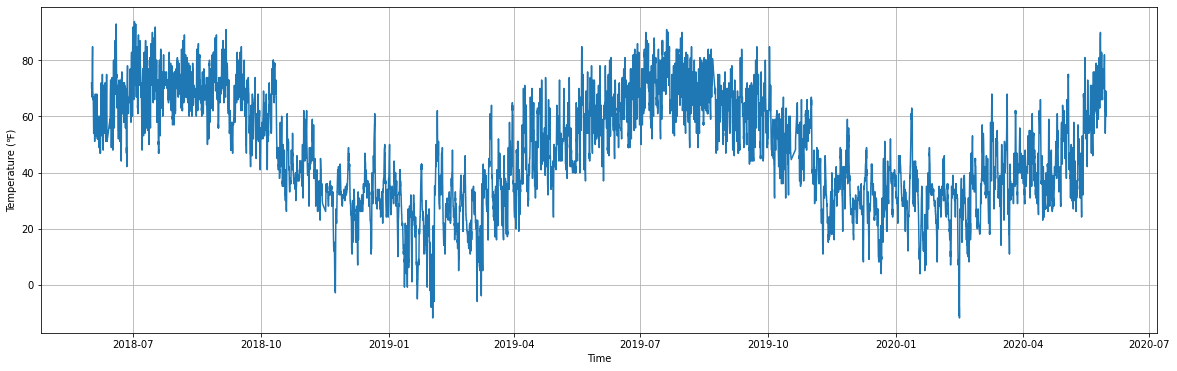

In [125]:
plt.figure(figsize=(20, 6))
plt.plot(time_stamp, temp_series)
plt.xlabel("Time")
plt.ylabel("Temperature (℉)")
plt.grid(True)